In [ ]:
# Nama: Aulya Salsabila Khairunnisa
# NIM: 24060122140163
# Nama Dataset: Breast Cancer Wisconsin Dataset
# Link Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [184]:
## Pertemuan 3 - Hierarchical Clustering

In [185]:
### Import Libraries

## Pada praktikum ini kita akan menggunakan scipy dan scikit-learn package.

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [53]:
### 1. Teknik Agglomerative untuk Dataset Random

In [54]:
#### Generate Random Data menggunakan make_blobs

In [55]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

In [56]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

In [57]:
#### Plotting Random Data

### Menghasilkan output yang membagi data menjadi beberapa kelompok

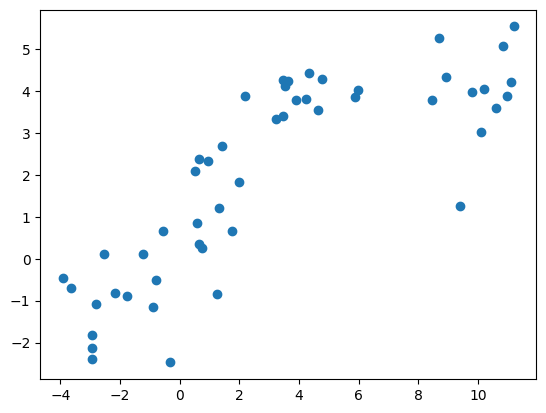

In [58]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [59]:
#### Agglomerative Clustering

### Kelas Agglomerative Clustering akan membutuhkan dua masukan yaitu n_clusters dan linkage

In [60]:
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

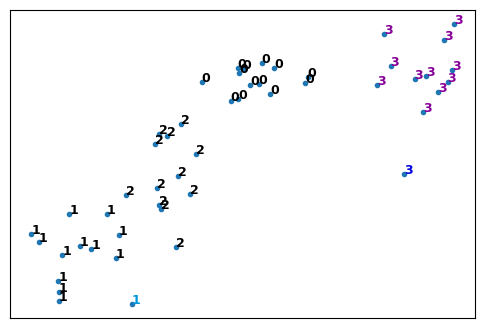

In [61]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

In [62]:
#### Plotting Dendogram (Mencari Jarak)
### Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi.

In [63]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.48421915 0.93399709 ... 0.59948381 0.85920666 0.38555838]
 [0.48421915 0.         0.81935472 ... 0.53527305 0.6777633  0.53472336]
 [0.93399709 0.81935472 0.         ... 0.33708551 0.16354409 1.24106463]
 ...
 [0.59948381 0.53527305 0.33708551 ... 0.         0.27082356 0.90719611]
 [0.85920666 0.6777633  0.16354409 ... 0.27082356 0.         1.13311744]
 [0.38555838 0.53472336 1.24106463 ... 0.90719611 1.13311744 0.        ]]


In [64]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-64-cc9c708ec4ba>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-64-cc9c708ec4ba>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')
<ipython-input-64-cc9c708ec4ba>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Text(0.5, 1.0, 'Single Linkage')

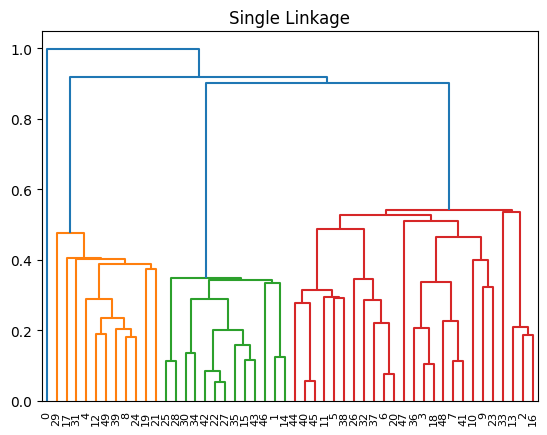

In [65]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

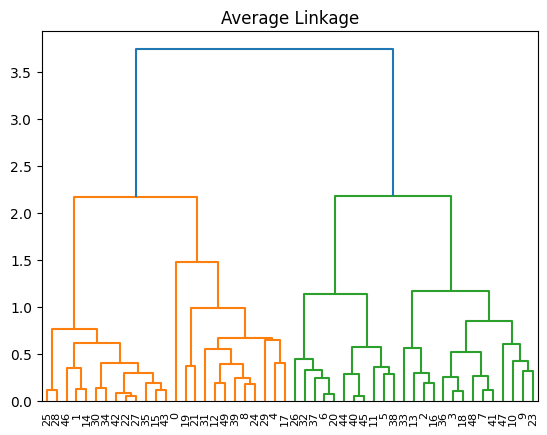

In [66]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

Text(0.5, 1.0, 'Complete Linkage')

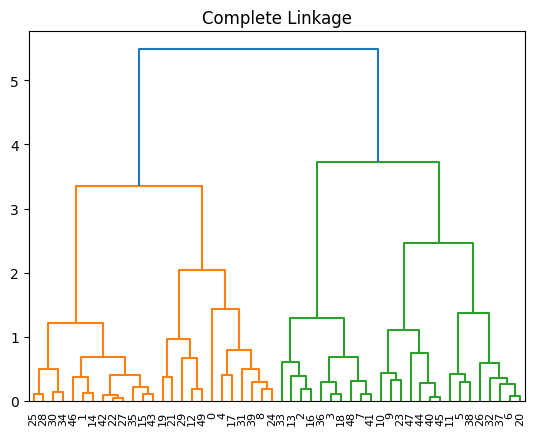

In [67]:
# Complete Linkage
dendroZ = hierarchy.dendrogram(Z)
plt.title("Complete Linkage")

In [187]:
# KESIMPULAN
# Single Linkage: Lebih baik digunakan jika Anda ingin menemukan hubungan lokal antar data.
# Average Linkage: Lebih cocok untuk membentuk cluster yang lebih stabil dan terdistribusi merata.

In [68]:
### 2. Teknik Agglomerative untuk Cars Clustering

In [69]:
#### Read Data

In [70]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/drive/MyDrive/cars_clus.csv")

In [71]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [72]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


In [73]:
#### Data Cleaning
### Melakukan data cleaning dengan membuang baris yang memiliki nilai null.

In [74]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


In [75]:
#### Features Selection

In [76]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [77]:
#### Normalization

In [78]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [79]:
#### A. Agglomerative Clustering with Scipy
### Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk.

In [80]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-80-fb67c369474a>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [81]:
#### Complete Linkage

In [82]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-82-1190c8367043>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [83]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [84]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [85]:
#### Plotting Dendogram Complete Linkage

### Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

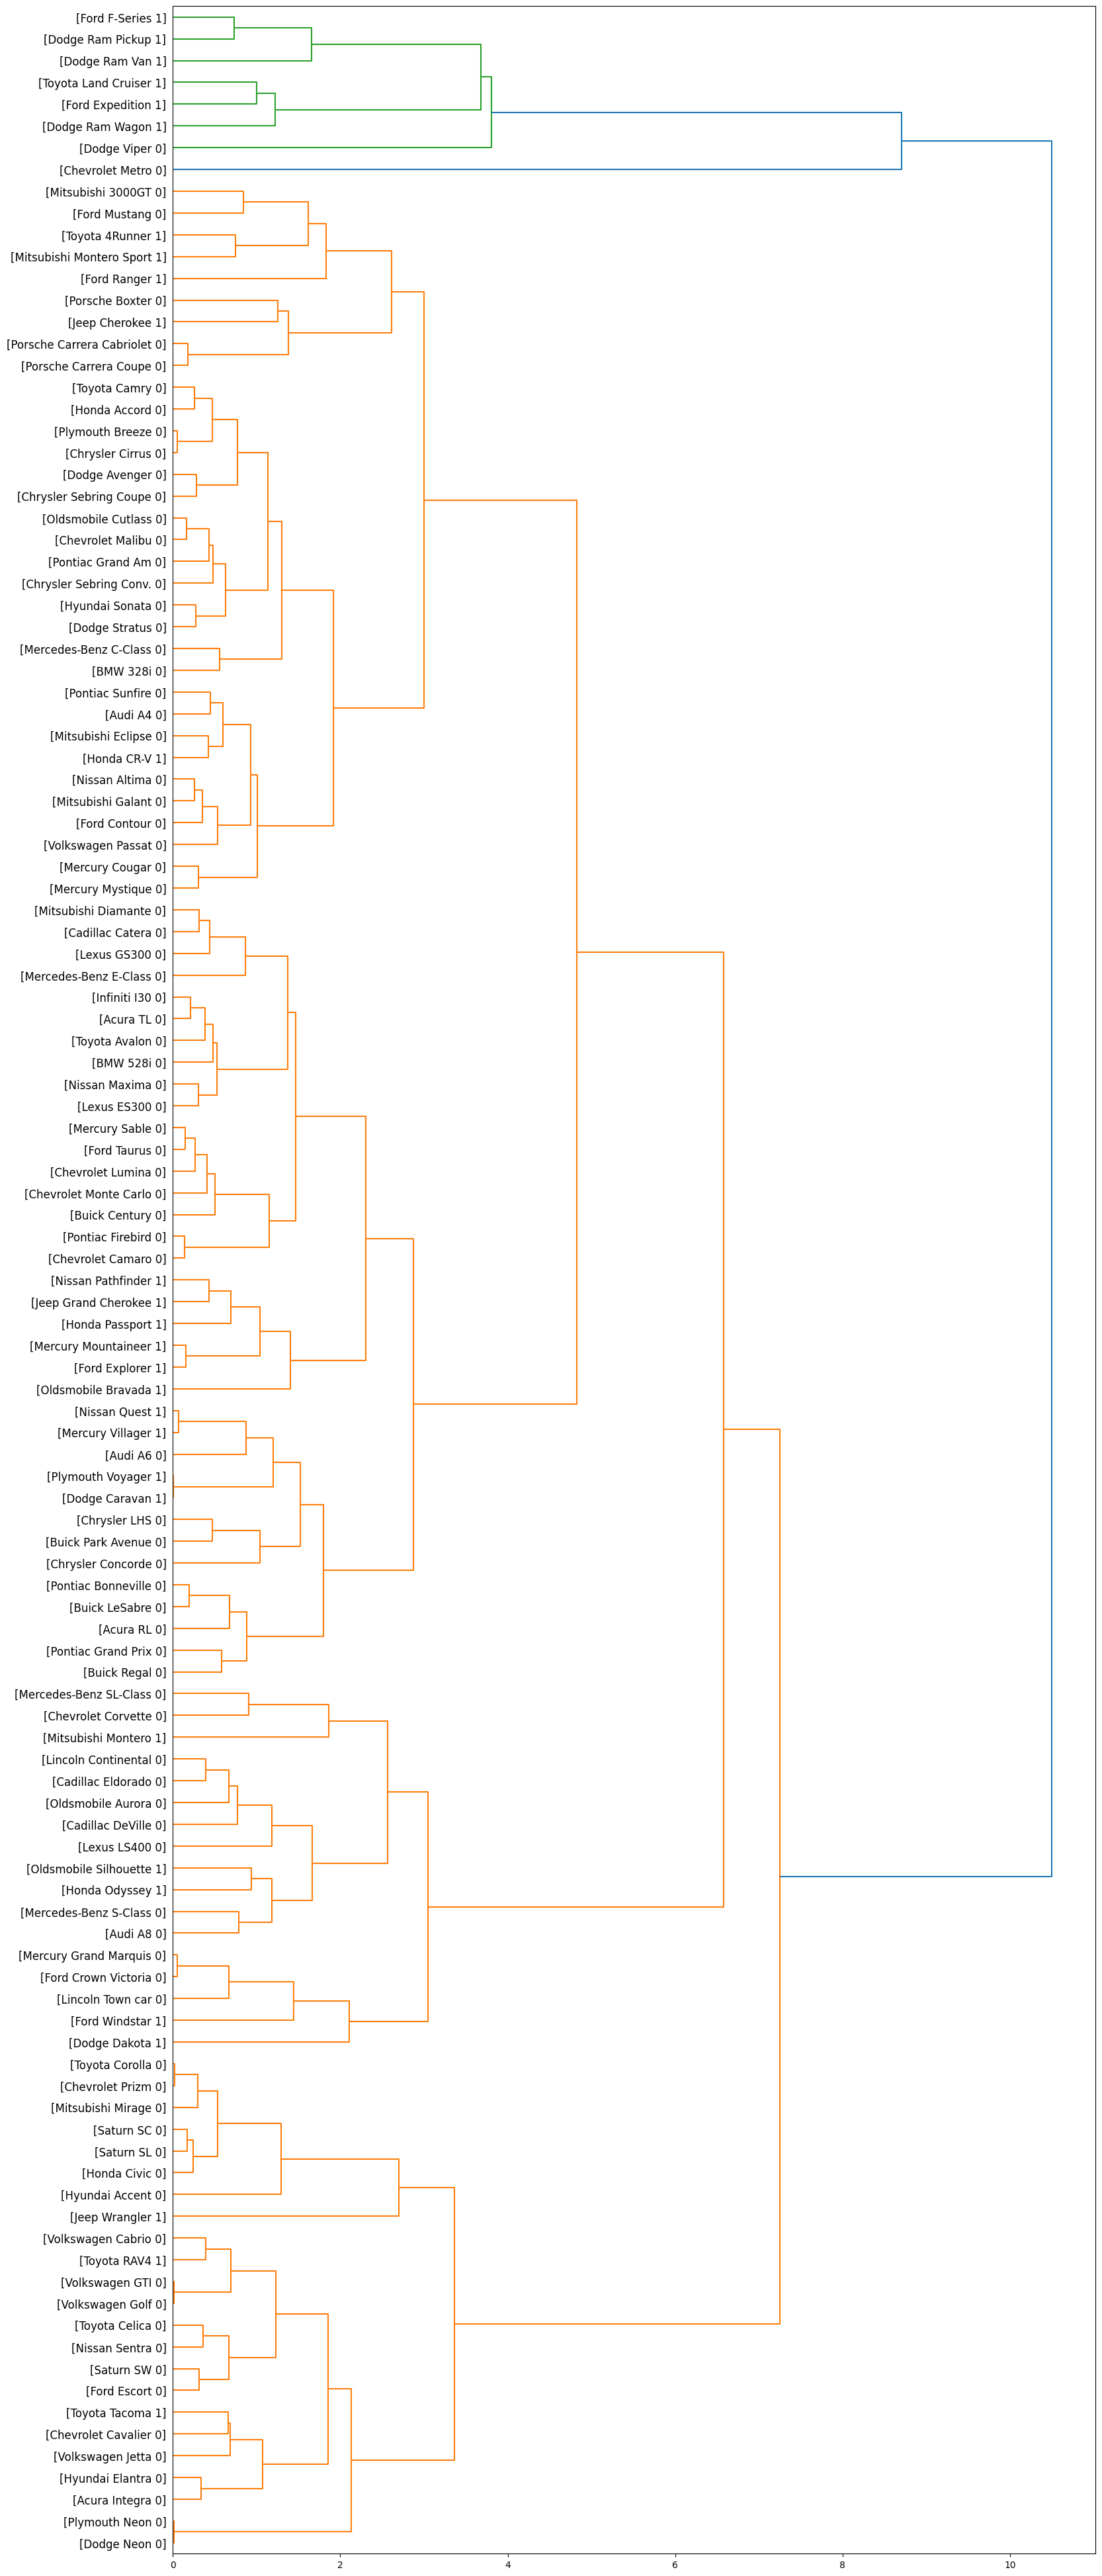

In [86]:
# Complete Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [87]:
#### B. Agglomerative Clustering with Scikit Learn
### Library scikit-learn digunakan untuk  mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.
### Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [88]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [89]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [90]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


In [91]:
#### Plotting dengan scatter plot

<ipython-input-92-8d78fab03987>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

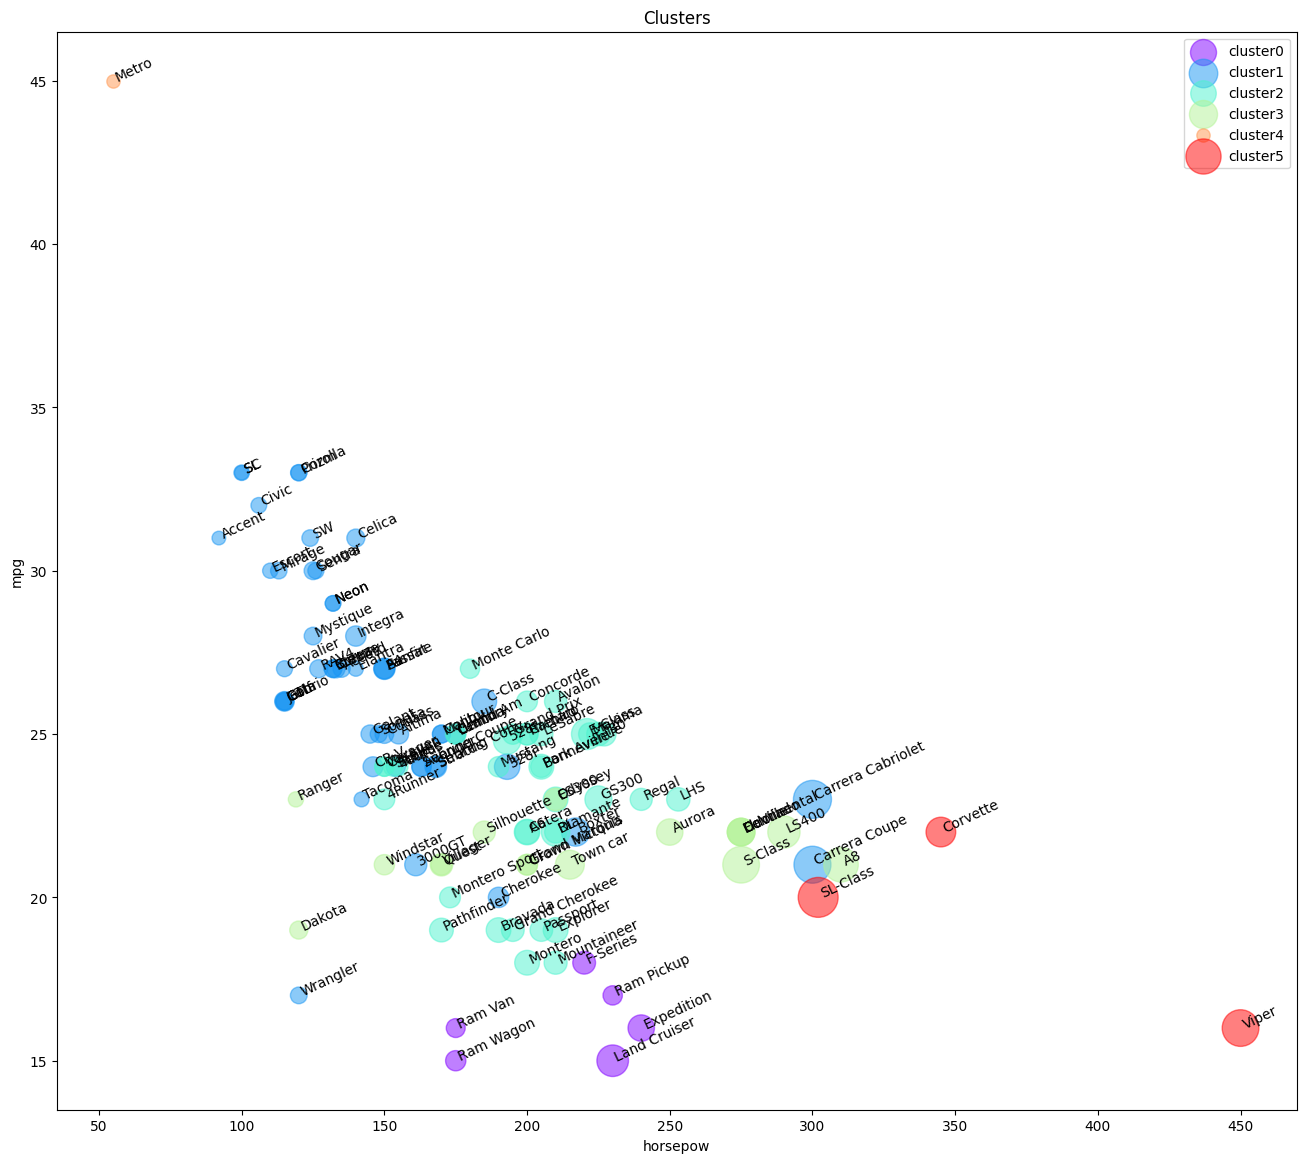

In [92]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [93]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [95]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

In [96]:
#### Ploting Dendogram Complete Linkage

<ipython-input-97-eef09f8da310>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
<ipython-input-97-eef09f8da310>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

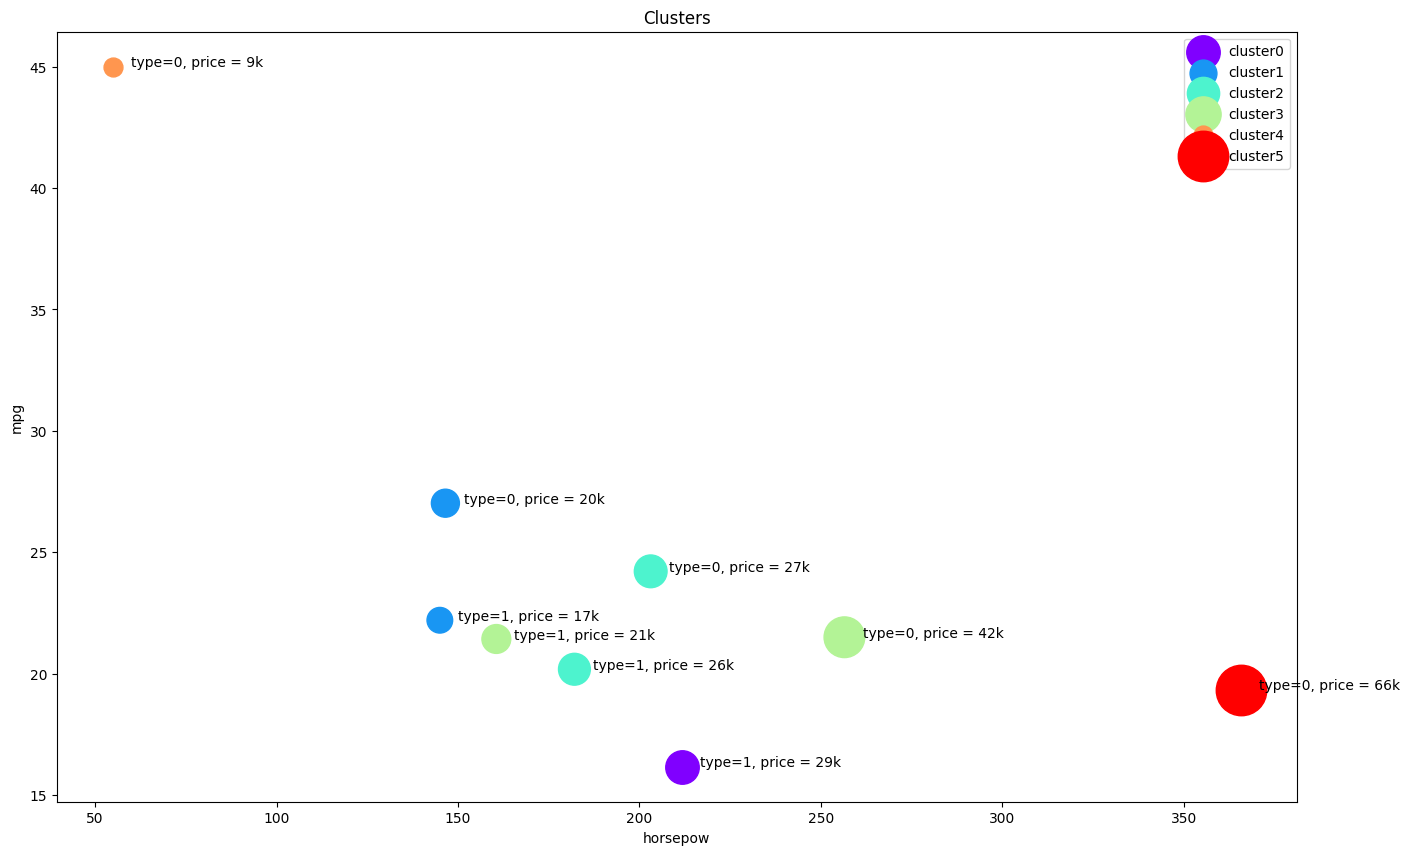

In [97]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [188]:
# KESIMPULAN
# Scipy: Digunakan untuk memahami proses penggabungan cluster secara bertahap (hierarki).
# Sklearn: Menghasilkan hasil clustering akhir yang dapat digunakan langsung untuk analisis lanjutan.

In [98]:
### 3. Teknik Agglomerative untuk Breast Cancer Wisconsin Dataset

In [99]:
#### Read Data

In [113]:
# Mengunduh dataset dari URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
pdf = pd.read_csv(url, header=None, names=column_names)

In [114]:
# Menampilkan dimensi dataset
pdf.shape

(569, 32)

In [115]:
# Menampilkan 10 data teratas
pdf.head(10)

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [116]:
#### Data Cleaning
### Melakukan data cleaning dengan membuang baris yang memiliki nilai null.

In [117]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.shape)

# Mengubah kolom fitur tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
# Kolom 'diagnosis' adalah kolom kategorikal, jadi hanya kolom fitur yang akan dikonversi menjadi numerik
pdf[['feature_' + str(i) for i in range(1, 31)]] = pdf[['feature_' + str(i) for i in range(1, 31)]].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Dimensi dataset setelah cleaning:", pdf.shape)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: (569, 32)
Dimensi dataset setelah cleaning: (569, 32)


,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [118]:
#### Features Selection

In [121]:
# Memilih fitur yang relevan (fitur dari feature_1 hingga feature_30)
featureset = pdf[['feature_' + str(i) for i in range(1, 31)]]
featureset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [122]:
#### Normalization

In [123]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
        0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
        0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
        0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        0.4310165 , 0.46251172, 0.63568588, 0.50959596, 0.21124684,
        0.22962158, 0.09430251, 0.18037035, 0.

In [124]:
#### A. Agglomerative Clustering with Scipy
### Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk.

In [125]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-125-fb67c369474a>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [126]:
#### Complete Linkage

In [127]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-127-1190c8367043>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [128]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([192,  17, 178, 158,  22,  33,  11,  35,  33, 187, 127, 147, 161,
       137, 172,  32, 138,  31, 175,  90,  70,  96, 171, 175,  21, 168,
        32,  14,  27,   9, 178,  33,  27,  21,  37,  39, 142,  54, 122,
       145, 109, 133, 160, 142, 139, 180,  46,  35,  75, 109, 113, 114,
       111,  12, 138, 111,  23, 145,  54,  63,  66,  65,  32,  64,  35,
       145, 103, 111, 189,  99,  17,   4, 181, 141,  76, 144, 130, 180,
       155,  76,  67, 151, 190, 182,  78,  12, 137,  29,  85, 149, 109,
       143, 115,  76,  38,  25,  74,  46,  79, 142, 136,  61, 112,  67,
        97,  34,  83,  76, 156,  67, 103,  82,   5, 104,  62,  77,  58,
        37,  31,  20,  79,  12, 157,  90, 118, 114, 139,  19, 149,  21,
        70, 148, 144,  88,  11, 110,  95, 111,  16, 105,  47, 143,  74,
        80, 101, 131,   7, 137, 141, 114, 106,   2, 159,  96,  86,  76,
        13, 127,  99,  55,  69,  18, 183,  68, 173, 115,  48, 144,  21,
       116,  79,  87,  37,  46,  53,  47,   2,  38,  52, 100, 19

In [129]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([5, 1, 4, 3, 1, 1, 1, 1, 1, 5, 2, 2, 4, 2, 4, 1, 2, 1, 4, 2, 2, 2,
       4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 5, 2, 1, 1, 4, 2, 2, 2, 2, 4, 3, 2, 2, 2, 5, 4, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 4, 2, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 5, 5, 2, 2, 2, 2, 1, 2, 2, 2, 5, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 5, 4, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 1, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 4, 1, 2, 4, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 4, 1, 1, 2, 4, 4, 4, 4, 1, 2, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,

In [130]:
#### Plotting Dendogram Complete Linkage

### Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

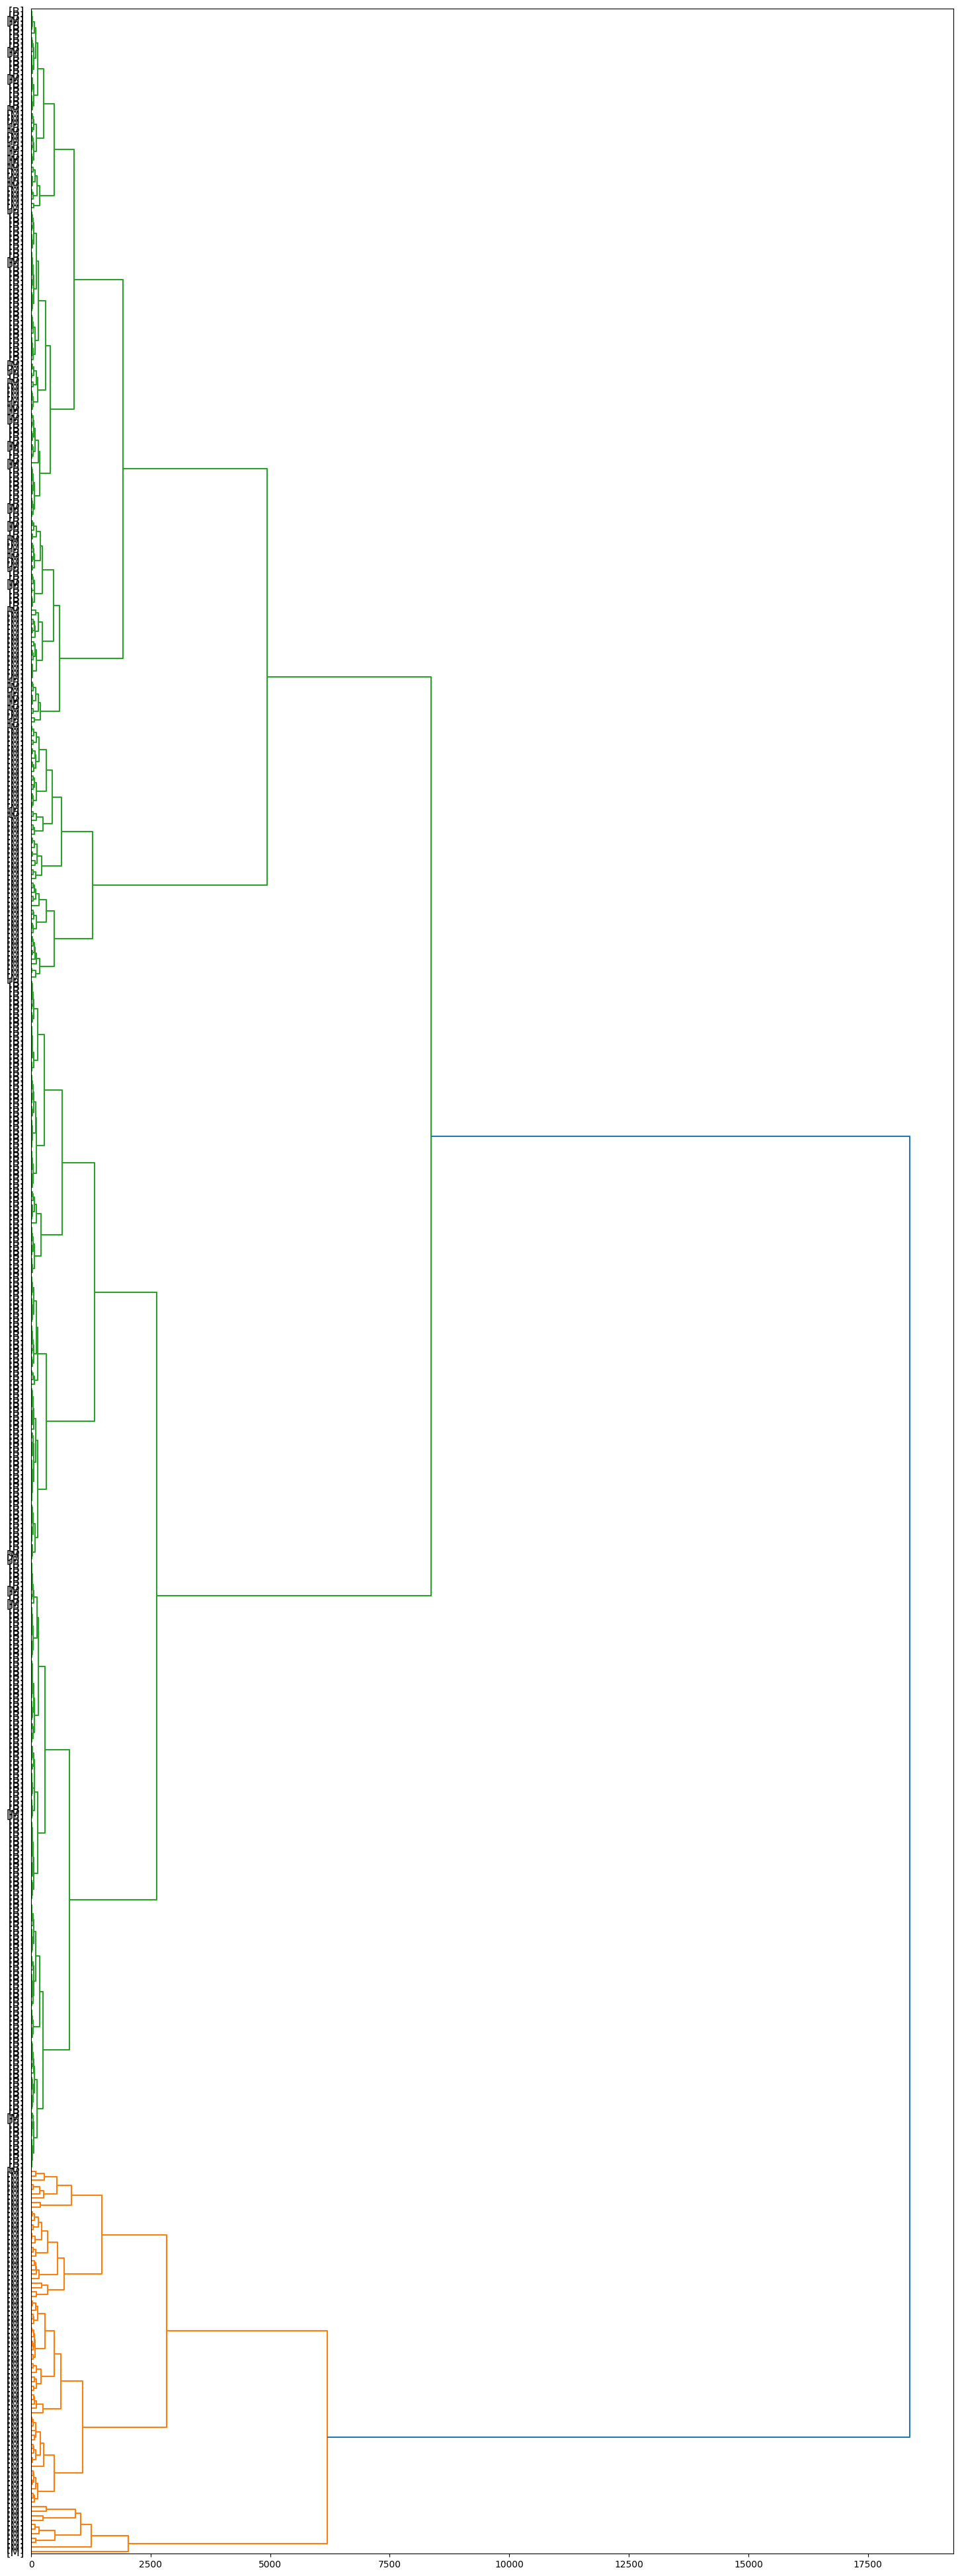

In [140]:
# Complete Dendogram

# Menentukan ukuran figure untuk dendrogram
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s]' % (pdf['diagnosis'][id])

# Hierarchical clustering
Z = hierarchy.linkage(pdf[['feature_' + str(i) for i in range(1, 31)]].values, method='ward')

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [134]:
#### B. Agglomerative Clustering with Scikit Learn
### Library scikit-learn digunakan untuk  mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.
### Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [135]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         1.49982926 0.95724027 ... 1.73121202 1.01357355 2.55303745]
 [1.49982926 0.         0.75412489 ... 0.74739839 1.66897866 1.64474438]
 [0.95724027 0.75412489 0.         ... 0.94564569 1.05278686 1.98474539]
 ...
 [1.73121202 0.74739839 0.94564569 ... 0.         1.63939692 1.25982562]
 [1.01357355 1.66897866 1.05278686 ... 1.63939692 0.         2.66200922]
 [2.55303745 1.64474438 1.98474539 ... 1.25982562 2.66200922 0.        ]]


In [136]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 1, 0, 2, 0, 4, 1, 4, 4, 2, 1, 4, 4, 1, 2, 4, 1, 0, 0, 1, 1, 5,
       4, 0, 0, 0, 4, 0, 4, 1, 0, 4, 0, 0, 4, 4, 4, 5, 1, 4, 1, 4, 4, 4,
       4, 0, 5, 4, 1, 1, 1, 1, 5, 0, 1, 5, 0, 4, 5, 1, 5, 5, 4, 1, 4, 4,
       5, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 5, 4, 0, 0, 5, 0, 1, 0,
       5, 4, 1, 1, 1, 1, 4, 0, 5, 5, 1, 1, 1, 5, 1, 1, 5, 4, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 4, 1, 4, 0, 1, 4,
       4, 1, 1, 5, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 4, 1, 1, 1, 5, 1, 2, 5,
       1, 5, 0, 1, 1, 5, 1, 1, 0, 5, 0, 1, 5, 1, 0, 1, 5, 1, 4, 1, 5, 5,
       1, 4, 5, 5, 0, 0, 4, 1, 4, 5, 1, 1, 5, 1, 2, 5, 5, 4, 4, 5, 4, 1,
       0, 4, 5, 1, 0, 4, 1, 1, 5, 1, 4, 1, 1, 1, 3, 1, 4, 4, 1, 5, 0, 0,
       1, 1, 5, 4, 1, 1, 5, 1, 1, 4, 0, 5, 5, 0, 5, 1, 0, 1, 1, 0, 1, 5,
       4, 1, 0, 5, 1, 4, 5, 1, 0, 5, 0, 1, 0, 1, 0, 0, 0, 4, 0, 1, 0, 1,
       1, 0, 1, 1, 5, 1, 5, 5, 0, 5, 1, 1, 5, 1, 1, 1, 0, 5, 0, 4, 1, 5,
       1, 5, 1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 5, 0,

In [137]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,cluster_
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [138]:
#### Plotting dengan scatter plot

<ipython-input-143-8972e0440632>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['feature_1'], subset['feature_2'], s=subset['feature_1']*10, c=color, label='cluster'+str(label), alpha=0.5)


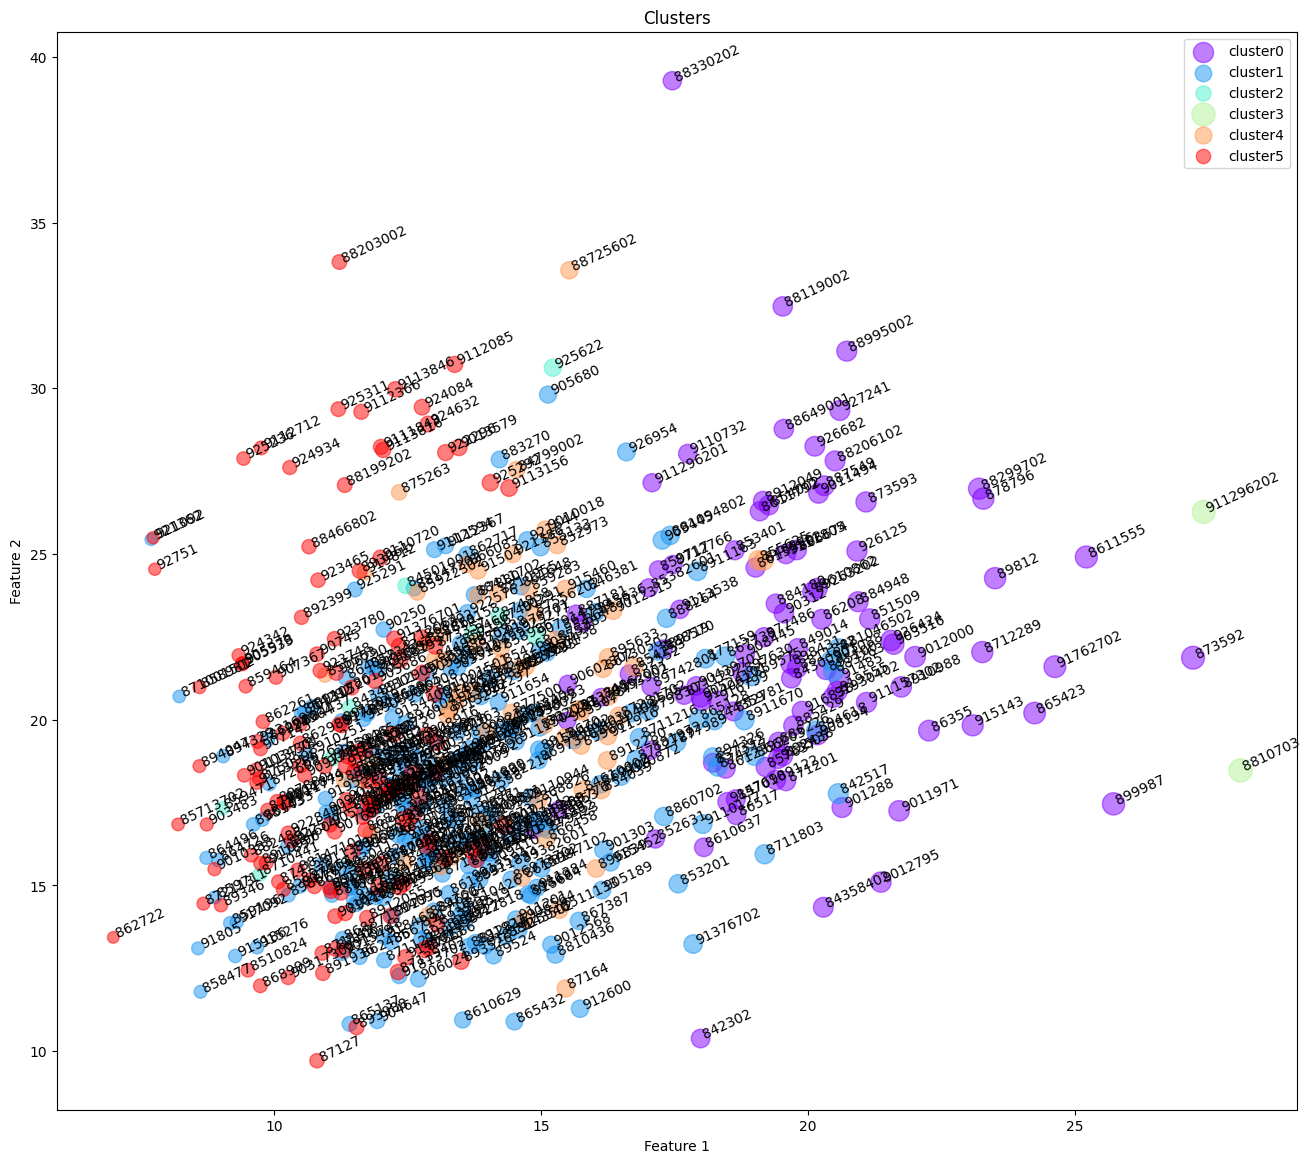

In [143]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 16x14 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['feature_1'][i], subset['feature_2'][i], str(subset['id'][i]), rotation=25)
    plt.scatter(subset['feature_1'], subset['feature_2'], s=subset['feature_1']*10, c=color, label='cluster'+str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [145]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'diagnosis'])['cluster_'].count()

cluster_  diagnosis
0         M             96
1         B            199
          M             49
2         B              2
          M              7
3         M              2
4         B             11
          M             56
5         B            145
          M              2
Name: cluster_, dtype: int64

In [155]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'diagnosis'])[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']].mean()
agg_cars

feature_1  feature_2   feature_3    feature_4  feature_5
cluster_ diagnosis                                                          
0        M          19.626146  22.137292  130.398333  1211.838542   0.105417
1        B          12.754271  17.191508   82.348945   508.845729   0.093731
         M          16.800408  20.865510  109.022245   891.595918   0.090049
2        B           9.380000  16.335000   61.285000   275.350000   0.106900
         M          13.290000  23.161429   89.760000   544.814286   0.115367
3        M          27.765000  22.370000  187.700000  2500.000000   0.111300
4        B          13.280909  18.550000   87.399091   540.727273   0.103194
         M          14.673214  21.163750   97.083750   672.142857   0.108244
5        B          11.264545  18.880966   71.734621   396.255862   0.089746
         M          12.265000  20.305000   78.360000   468.700000   0.095115

In [156]:
#### Ploting Dendogram Complete Linkage

<ipython-input-170-c622b6c1a6c6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['feature_1'], subset['feature_2'], s = subset['feature_3']*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'feature_2')

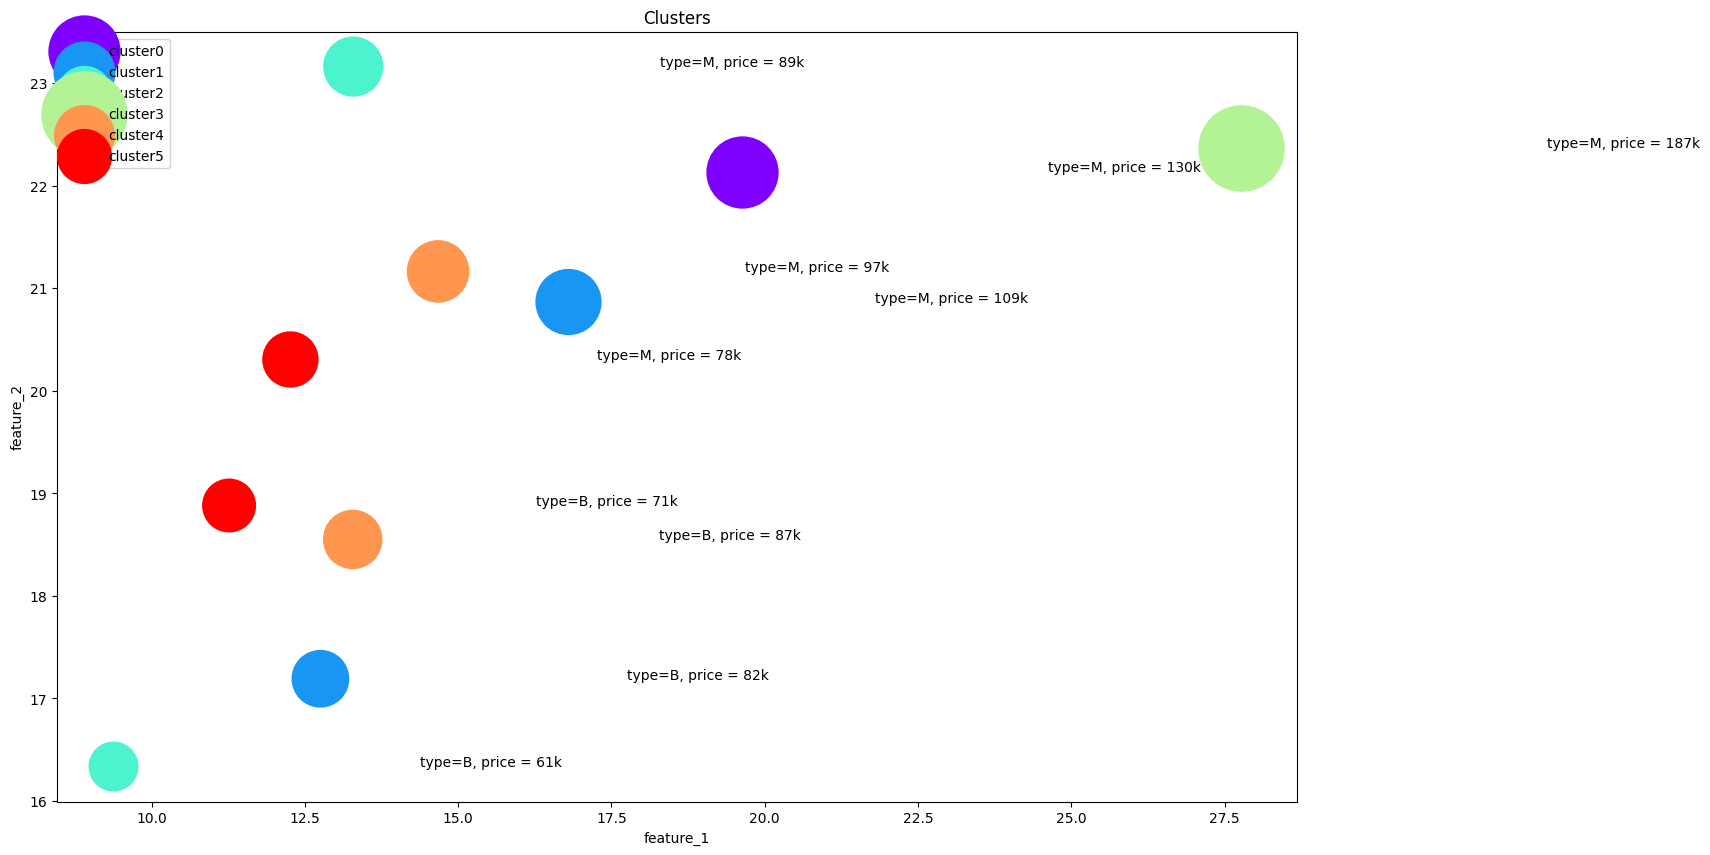

In [170]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    type_val = i[1] if isinstance(i, tuple) else i
    price_val = int(subset.loc[i]['feature_3'])
    plt.text(subset.loc[i]['feature_1'] + 5, subset.loc[i]['feature_2'], 'type=' + str(type_val) + ', price = ' + str(price_val) + 'k')
  plt.scatter(subset['feature_1'], subset['feature_2'], s = subset['feature_3']*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('feature_1')
plt.ylabel('feature_2')

In [ ]:
# KESIMPULAN
# Single Linkage: Cenderung menghasilkan klaster yang lebih memanjang karena jarak antar dua klaster diukur berdasarkan titik terdekat. Ini dapat menyebabkan "klaster rantai" yang tidak kompak.
# Average Linkage: Menghitung jarak rata-rata antar klaster. Ini menghasilkan klaster yang lebih bulat dan lebih stabil dibandingkan dengan single linkage.
# Complete Linkage: Menghitung jarak terjauh antar titik dalam dua klaster. Ini menghasilkan klaster yang lebih kompak dan sensitif terhadap outliers, karena jarak terjauh dipertimbangkan.

In [172]:
### 4.  Principal Component Analysis untuk Breast Cancer Wisconsin Dataset

In [178]:
# Menyaring fitur numerik dan menghapus kolom non-numerik
features = pdf.drop(['id', 'diagnosis'], axis=1)
labels = pdf['diagnosis']

In [179]:
# Import the necessary library and class
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [181]:
# Import the necessary library and class
from sklearn.decomposition import PCA

# Melakukan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

In [182]:
# Menampilkan varians yang dijelaskan oleh masing-masing komponen utama
print(f"Explained variance ratio (komponen utama): {pca.explained_variance_ratio_}")

Explained variance ratio (komponen utama): [0.43572418 0.18501657]


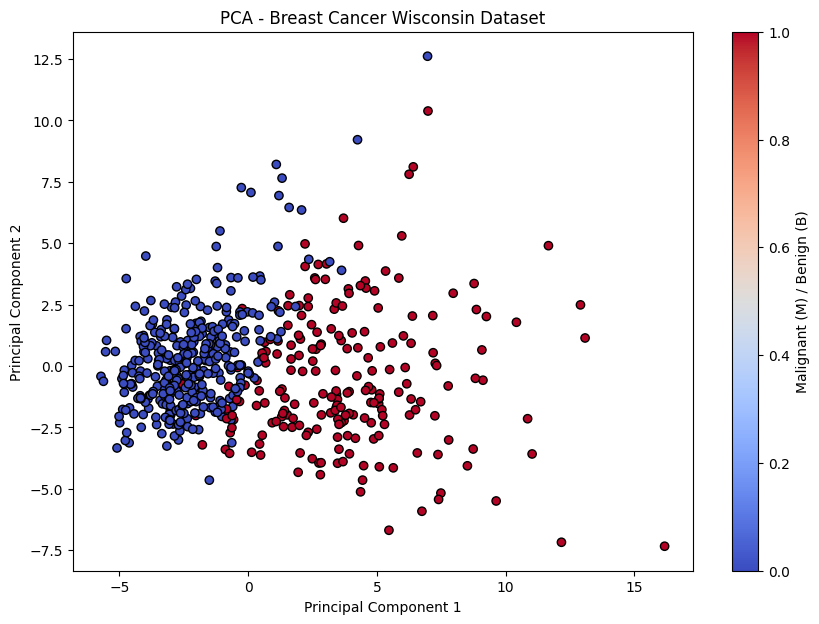

In [183]:
# Visualisasi hasil PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=(labels == 'M').astype(int), cmap='coolwarm', edgecolor='k')
plt.title('PCA - Breast Cancer Wisconsin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Malignant (M) / Benign (B)')
plt.show()

In [189]:
# KESIMPULAN
# Variance Ratio: Anda akan melihat berapa banyak variasi yang dijelaskan oleh dua komponen utama. Biasanya, dua komponen pertama akan menjelaskan sebagian besar variasi dalam data.
# Scatter Plot: Visualisasi hasil PCA dalam dua dimensi. Titik-titik dengan warna yang berbeda menunjukkan kategori malignant (M) atau benign (B).